In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax.numpy as jnp
import numpy as np
# Required package
from jax import grad, hessian

In [3]:
# plot utilities backends
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib qt 
# %matplotlib nbagg
%matplotlib widget   
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [4]:
# Optimizer algorithm
from Optimizer.VanillaGD import gd  # Gradient Descent
from Optimizer.AdaptiveGD import agd # Adaptive Steplength GD
from Optimizer.NormalizedGD import ngd  # Normalized GD
from Optimizer.AdaGD import adagrad  # ADAGRAD
from Optimizer.RMSPROP import rmsprop  # RMSPROP
from Optimizer.Adam import adam  # Adam
from Optimizer.Newton import newton  # Newton
from Optimizer.NewtonPinv import newtonpinv  # Newton with PINV
from Optimizer.Momentum import momentum  # Momentum

In [5]:
# Test Functions
from TestFunction.Functions import rastrigin, ackley, sphere

# Rastrigin function

The Rastrigin function ia s non-convexe function, probosed by Rastrigin in 1974. It is has multiple local minima and maxima, with a global minimum at 0. The n-dimensional function is defined by:

$$f(\mathbf{x})=An + \sum_{i=1}^{n}\left[x_i^2 - Acos(2\pi x_i)\right]$$

We can vizualize the 2D version bellow.

In [6]:
rastgrad = grad(rastrigin)
rasthess = hessian(rastrigin)

In [7]:
xx = np.linspace(-15, 15, 1000)
yy = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Pro

systemMemory: 18.00 GB
maxCacheSize: 6.00 GB



W0000 00:00:1717652980.054327   73612 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1717652980.064478   73612 service.cc:145] XLA service 0x1380c76b0 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717652980.064493   73612 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1717652980.067602   73612 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1717652980.067618   73612 mps_client.cc:384] XLA backend will use up to 12883132416 bytes on device 0 for SimpleAllocator.


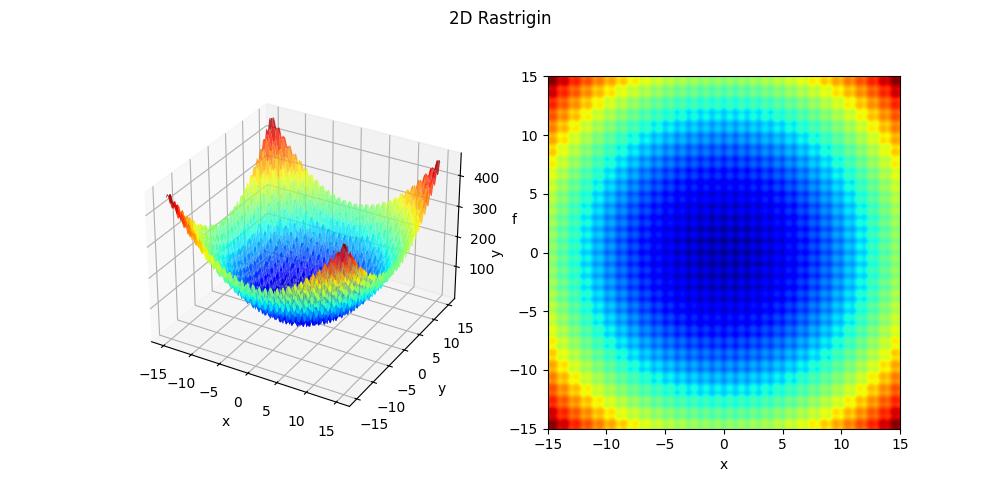

In [8]:
plt.close()
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f')

# Plot the contour
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, levels=1000, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Rastrigin')
plt.show()

In [9]:
x0 = 2 * np.random.normal(0, 1, size=2)
it = 100
hist_grad = gd(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist_agrad = agd(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist_mom = momentum(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist_ngrad = ngd(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_adam = adam(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_adagrad = adagrad(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_rmsprop = rmsprop(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_newt = newton(rastrigin, rastgrad, rasthess, x0.copy(), it // 2)
hist_newtpinv = newtonpinv(rastrigin, rastgrad, rasthess, x0.copy(), (it-10) // 2)

Newton's Pinv.: 100%|==========| 45/45 [00:02<00:00, 18.21it/s, grad=(-0.000, 0.000), loss=20.251, x=(0.503, 0.000)]


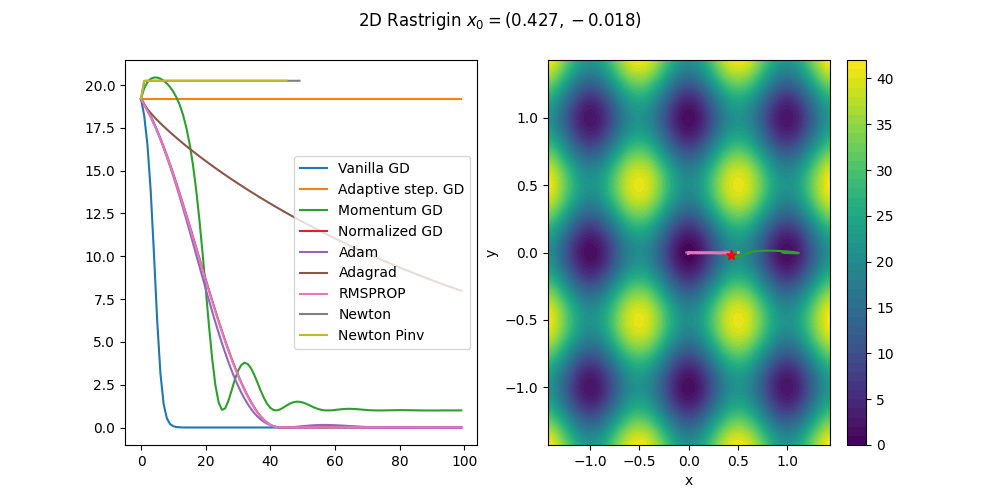

In [10]:
plt.close()
maxi = max(jnp.abs(x0)) + 1
xx = np.linspace(-maxi, maxi, 1000)
yy = np.linspace(-maxi, maxi, 1000)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(hist_grad['loss'], '-', label="Vanilla GD")
ax1.plot(hist_agrad['loss'], '-', label="Adaptive step. GD")
ax1.plot(hist_mom['loss'], '-', label="Momentum GD")
ax1.plot(hist_ngrad['loss'], '-', label="Normalized GD")
ax1.plot(hist_adam['loss'], '-', label="Adam")
ax1.plot(hist_adagrad['loss'], '-', label="Adagrad")
ax1.plot(hist_rmsprop['loss'], '-', label="RMSPROP")
ax1.plot(hist_newt['loss'], '-', label="Newton")
ax1.plot(hist_newtpinv['loss'], '-', label="Newton Pinv")
ax1.legend()

ax2 = fig.add_subplot(122)
cpf2 = ax2.contourf(X, Y, Z, levels=50)
plt.colorbar(cpf2)
ax2.plot(hist_grad['weights'][:, 0], hist_grad['weights'][:, 1], '-', label="Vanilla GD")
ax2.plot(hist_agrad['weights'][:, 0], hist_agrad['weights'][:, 1], '-', label="Adaptive step. GD")
ax2.plot(hist_mom['weights'][:, 0], hist_mom['weights'][:, 1], '-', label="Momentum GD")
ax2.plot(hist_ngrad['weights'][:, 0], hist_ngrad['weights'][:, 1], '-', label="Normalized GD")
ax2.plot(hist_adam['weights'][:, 0], hist_adam['weights'][:, 1], '-', label="Adam")
ax2.plot(hist_adagrad['weights'][:, 0], hist_adagrad['weights'][:, 1], '-', label="Adagrad")
ax2.plot(hist_rmsprop['weights'][:, 0], hist_rmsprop['weights'][:, 1], '-', label="RMSPROP")
ax2.plot(hist_newt['weights'][:, 0], hist_newt['weights'][:, 1], '-', label="Newton")
ax2.plot(hist_newtpinv['weights'][:, 0], hist_newtpinv['weights'][:, 1], '-', label="Newton Pinv")
plt.scatter(x0[0], x0[1], marker='*', color='red', s=50, label='$x_0$', zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# ax2.legend()
plt.suptitle(f'2D Rastrigin $x_0 = ({x0[0]:.3f}, {x0[1]:.3f})$')
plt.show()

All of those optimization algorithm will fill to find these global minima of the Rastrigin function, if they are not initialized near to that points, because all of them are a local optimization algorithm. 

* The  Newton's methode is the first one who conveges, but depending on initial stat point it will get stuck on a local maxima, or a saddles points.
* The vanilla gradient descent is the second one to converge in a local mimima, followed by other functions.
* We can also observe that, the Momentum GD converge to another local minima.

## Sphere Function

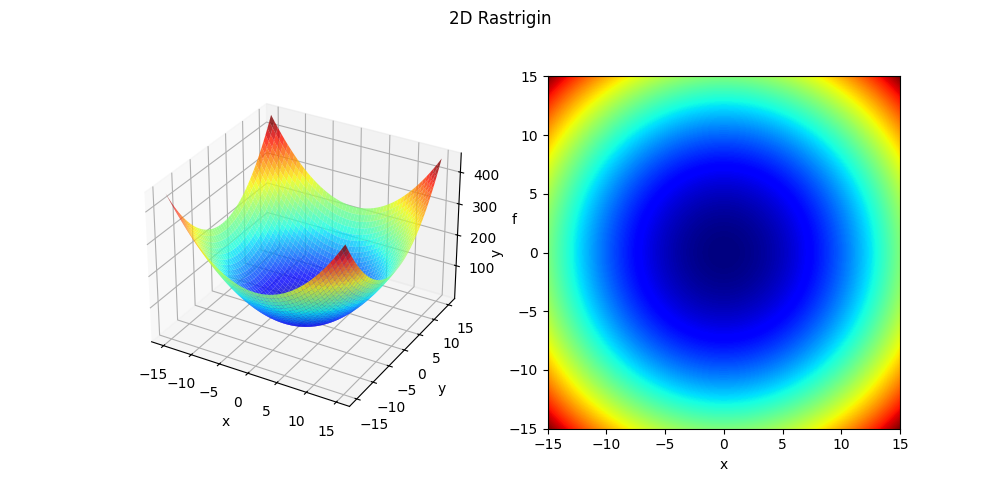

In [11]:
xx = np.linspace(-15, 15, 1000)
yy = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(xx, yy)
Z = sphere(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
Z = Z.reshape(X.shape)

plt.close()
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x');
ax1.set_ylabel('y')
ax1.set_zlabel('f')

# Plot the contour
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, levels=1000, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Rastrigin')
plt.show()

In [12]:
spheregrad = grad(sphere)
spherehess = hessian(sphere)

In [20]:
x1 = 2 * np.random.normal(0, 1, size=2)
it = 100
hist1_grad = gd(sphere, spheregrad, x1.copy(), it, 0.001)
hist1_agrad = agd(rastrigin, rastgrad, x0.copy(), it, 0.0001)
hist1_mom = momentum(sphere, spheregrad, x1.copy(), it, 0.01)
hist1_ngrad = ngd(sphere, spheregrad, x1.copy(), it, 0.01)
hist1_adam = adam(sphere, spheregrad, x1.copy(), it, 0.01)
hist1_adagrad = adagrad(sphere, spheregrad, x1.copy(), it, 0.01)
hist1_rmsprop = rmsprop(sphere, spheregrad, x1.copy(), it, 0.01)
hist1_newt = newton(sphere, spheregrad, spherehess, x1.copy(), it // 2)
hist1_newtpinv = newtonpinv(sphere, spheregrad, spherehess, x1.copy(), it // 2)

Newton's Pinv.:   4%|          | 2/50 [00:00<00:01, 36.16it/s, grad=(0.000, 0.000), loss=0.000, x=(0.000, 0.000)]


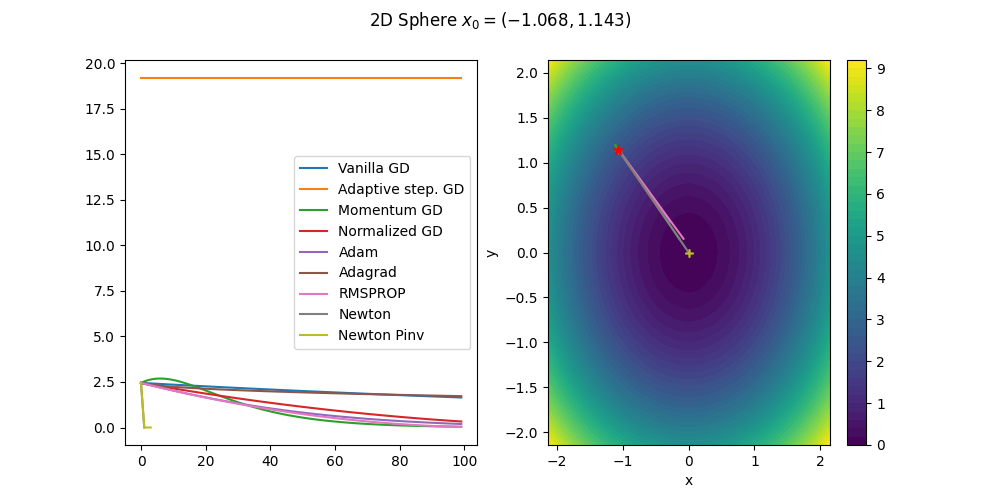

In [19]:
plt.close()
maxi = max(jnp.abs(x1)) + 1
xx = np.linspace(-maxi, maxi, 1000)
yy = np.linspace(-maxi, maxi, 1000)
X, Y = np.meshgrid(xx, yy)
Z = sphere(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(hist1_grad['loss'], '-', label="Vanilla GD")
ax1.plot(hist1_agrad['loss'], '-', label="Adaptive step. GD")
ax1.plot(hist1_mom['loss'], '-', label="Momentum GD")
ax1.plot(hist1_ngrad['loss'], '-', label="Normalized GD")
ax1.plot(hist1_adam['loss'], '-', label="Adam")
ax1.plot(hist1_adagrad['loss'], '-', label="Adagrad")
ax1.plot(hist1_rmsprop['loss'], '-', label="RMSPROP")
ax1.plot(hist1_newt['loss'], '-', label="Newton")
ax1.plot(hist1_newtpinv['loss'], '-', label="Newton Pinv")
ax1.legend()

ax2 = fig.add_subplot(122)
cpf2 = ax2.contourf(X, Y, Z, levels=50)
plt.colorbar(cpf2)
ax2.plot(hist1_grad['weights'][:, 0], hist1_grad['weights'][:, 1], '-', label="Vanilla GD")
ax2.plot(hist_agrad['weights'][:, 0], hist_agrad['weights'][:, 1], '-', label="Adaptive step. GD")
ax2.plot(hist1_mom['weights'][:, 0], hist1_mom['weights'][:, 1], '-', label="Momentum GD")
ax2.plot(hist1_ngrad['weights'][:, 0], hist1_ngrad['weights'][:, 1], '-', label="Normalized GD")
ax2.plot(hist1_adam['weights'][:, 0], hist1_adam['weights'][:, 1], '-', label="Adam")
ax2.plot(hist1_adagrad['weights'][:, 0], hist1_adagrad['weights'][:, 1], '-', label="Adagrad")
ax2.plot(hist1_rmsprop['weights'][:, 0], hist1_rmsprop['weights'][:, 1], '-', label="RMSPROP")
ax2.plot(hist1_newt['weights'][:, 0], hist1_newt['weights'][:, 1], '+-', label="Newton")
ax2.plot(hist1_newtpinv['weights'][:, 0], hist1_newtpinv['weights'][:, 1], '+-', label="Newton Pinv")
plt.scatter(x1[0], x1[1], marker='*', color='red', s=50, label='$x_0$', zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# ax2.legend()
plt.suptitle(f'2D Sphere $x_0 = ({x1[0]:.3f}, {x1[1]:.3f})$')
plt.show()

## Ackley

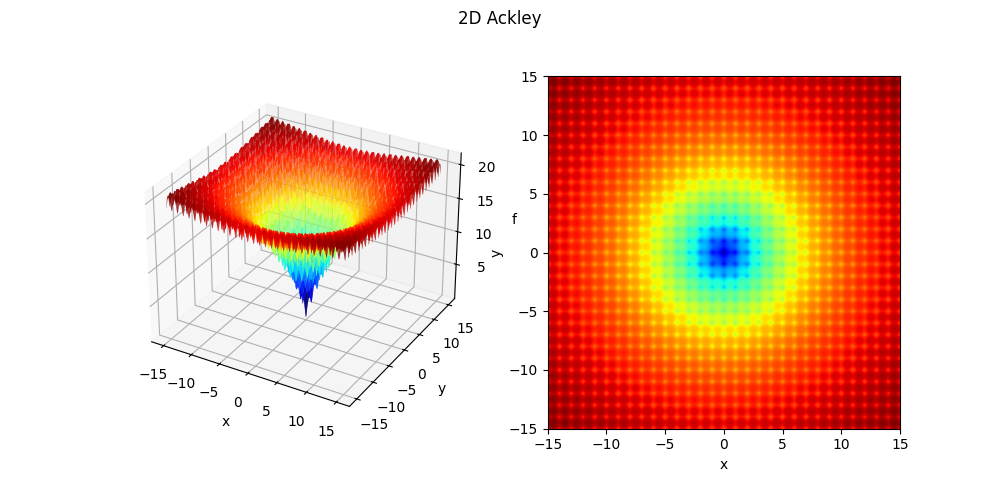

No such comm: 57696010079147a0892db294e80ba868


In [15]:
xx = np.linspace(-15, 15, 1000)
yy = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(xx, yy)
Z = ackley(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
Z = Z.reshape(X.shape)

plt.close()
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x');
ax1.set_ylabel('y')
ax1.set_zlabel('f')

# Plot the contour
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, levels=1000, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Ackley')
plt.show()

In [16]:
ackleygrad = grad(ackley)
ackleyhess = hessian(ackley)

In [17]:
x2 = 2 * np.random.normal(0, 1, size=2)
it = 100
hist2_grad = gd(ackley, ackleygrad, x2.copy(), it, 0.001)
hist2_agrad = agd(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist2_mom = momentum(ackley, ackleygrad, x2.copy(), it, 0.01)
hist2_ngrad = ngd(ackley, ackleygrad, x2.copy(), it, 0.01)
hist2_adam = adam(ackley, ackleygrad, x2.copy(), it, 0.01)
hist2_adagrad = adagrad(ackley, ackleygrad, x2.copy(), it, 0.01)
hist2_rmsprop = rmsprop(ackley, ackleygrad, x2.copy(), it, 0.01)
hist2_newt = newton(ackley, ackleygrad, ackleyhess, x2.copy(), it // 2)
hist2_newtpinv = newtonpinv(ackley, ackleygrad, ackleyhess, x2.copy(), it // 2)

Newton's Pinv.: 100%|==========| 50/50 [00:02<00:00, 19.21it/s, grad=(-0.000, 0.000), loss=6.668, x=(1.773, -0.550)]


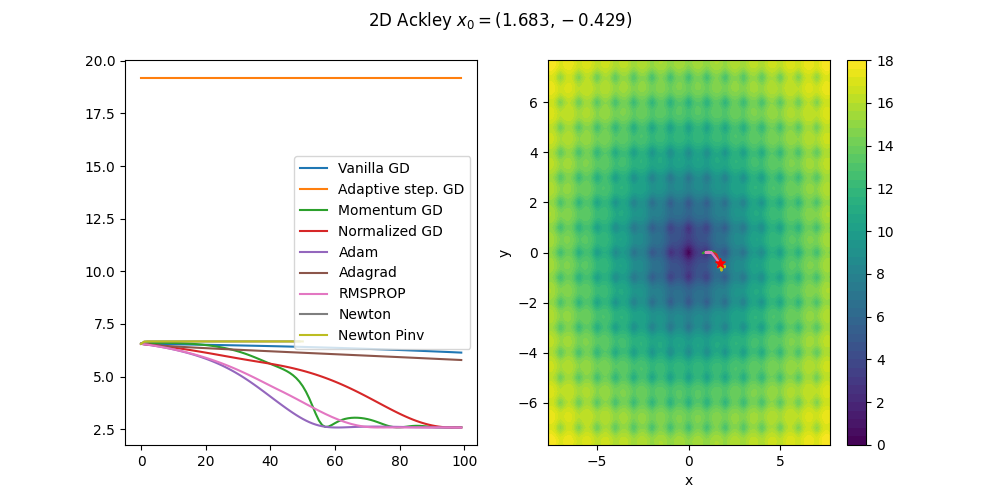

In [18]:
plt.close()
maxi = max(jnp.abs(x2)) + 6
xx = np.linspace(-maxi, maxi, 1000)
yy = np.linspace(-maxi, maxi, 1000)
X, Y = np.meshgrid(xx, yy)
Z = ackley(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(hist2_grad['loss'], '-', label="Vanilla GD")
ax1.plot(hist2_agrad['loss'], '-', label="Adaptive step. GD")
ax1.plot(hist2_mom['loss'], '-', label="Momentum GD")
ax1.plot(hist2_ngrad['loss'], '-', label="Normalized GD")
ax1.plot(hist2_adam['loss'], '-', label="Adam")
ax1.plot(hist2_adagrad['loss'], '-', label="Adagrad")
ax1.plot(hist2_rmsprop['loss'], '-', label="RMSPROP")
ax1.plot(hist2_newt['loss'], '-', label="Newton")
ax1.plot(hist2_newtpinv['loss'], '-', label="Newton Pinv")
ax1.legend()

ax2 = fig.add_subplot(122)
cpf2 = ax2.contourf(X, Y, Z, levels=50)
plt.colorbar(cpf2)
ax2.plot(hist2_grad['weights'][:, 0], hist2_grad['weights'][:, 1], '-', label="Vanilla GD")
ax2.plot(hist2_agrad['weights'][:, 0], hist_agrad['weights'][:, 1], '-', label="Adaptive step. GD")
ax2.plot(hist2_mom['weights'][:, 0], hist2_mom['weights'][:, 1], '-', label="Momentum GD")
ax2.plot(hist2_ngrad['weights'][:, 0], hist2_ngrad['weights'][:, 1], '-', label="Normalized GD")
ax2.plot(hist2_adam['weights'][:, 0], hist2_adam['weights'][:, 1], '-', label="Adam")
ax2.plot(hist2_adagrad['weights'][:, 0], hist2_adagrad['weights'][:, 1], '-', label="Adagrad")
ax2.plot(hist2_rmsprop['weights'][:, 0], hist2_rmsprop['weights'][:, 1], '-', label="RMSPROP")
ax2.plot(hist2_newt['weights'][:, 0], hist2_newt['weights'][:, 1], '+-', label="Newton")
ax2.plot(hist2_newtpinv['weights'][:, 0], hist2_newtpinv['weights'][:, 1], '+-', label="Newton Pinv")
plt.scatter(x2[0], x2[1], marker='*', color='red', s=50, label='$x_0$', zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# ax2.legend()
plt.suptitle(f'2D Ackley $x_0 = ({x2[0]:.3f}, {x2[1]:.3f})$')
plt.show()